## **EX 1 - Learning the data :)**

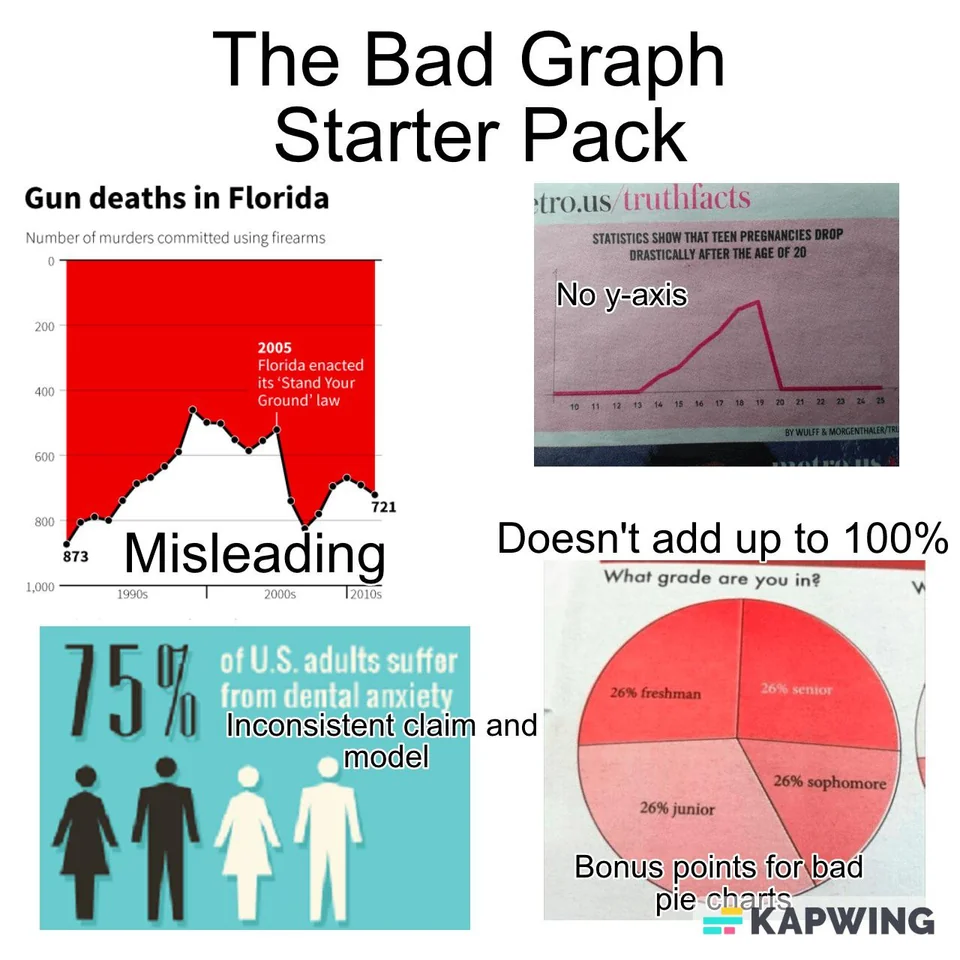   
Link: https://www.reddit.com/r/mathmemes/comments/12ec0u9/

### These are important imports

In [173]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from random import choice, sample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [174]:
sb.set(color_codes=True, rc={'figure.figsize': (5, 5)})
COLUMNS_IS_CATEGORY = "is_software	is_web	is_mobile	is_enterprise	is_advertising	is_gamesvideo	is_ecommerce	is_biotech	is_consulting	is_othercategory".split('\t')
COLUMNS_IN_STATE = "in_CA	in_NY	in_MA	in_TX	in_otherstate".split('\t')
ROUNDS = "roundA	roundB	roundC	roundD".split('\t')

### 1) Show the data information, e.g., types of attributes, the attributes values etc.

#### Reading the CSV file:

In [175]:
data_frame = pd.read_csv("./startup_dataset.csv")

#### Data information and examples of our data:

In [176]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   738 non-null    object 
 1   state_code           738 non-null    object 
 2   latitude             738 non-null    float64
 3   longitude            738 non-null    float64
 4   zip_code             738 non-null    object 
 5   city                 738 non-null    object 
 6   name                 738 non-null    object 
 7   foundation_date      738 non-null    object 
 8   first_funding_date   738 non-null    object 
 9   last_funding_date    738 non-null    object 
 10  first_funding_age    738 non-null    float64
 11  last_funding_age     738 non-null    float64
 12  first_milestone_age  609 non-null    float64
 13  last_milestone_age   609 non-null    float64
 14  connections          738 non-null    int64  
 15  funding_rounds       738 non-null    int

In [177]:
data_frame.head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,01/01/2007,04/01/2009,01/01/2010,...,0,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,01/01/2000,2/14/2005,12/28/2009,...,0,0,0,0,1,1,1,4.7500,1,acquired
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01/01/2002,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08/01/2010,08/01/2010,04/01/2012,...,0,0,0,0,0,0,0,1.0000,1,closed


In [178]:
data_frame.describe(include='all')

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,01/01/2002,01/01/2007,01/01/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


### 2) Show the data statistics, e.g.,  distribution, skewness, median and more.

#### Statistics of our data (some methods)

In [179]:
def print_stats(df: pd.DataFrame) -> None:
    for f in [pd.DataFrame.mean, pd.DataFrame.skew, pd.DataFrame.median, pd.DataFrame.std]:
        print(f"{f.__name__} = {f(df)}")
    print(f"mode = {df.mode()[0]}")

def show_distribution_numeric(df):
    colors = ['red', 'green', 'blue', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'grey']  # cool colors!
    binary_data = [col for col in df.columns if df[col].nunique() == 2] # binary data
    
    # prepare subplots
    chosen_colors = (x for x in sample(colors, 9))
    fig_non_binary, ax_non_binary = plt.subplots(3, 3, figsize=(16, 16))
    fig_non_binary.suptitle('Non-binary data histograms')
    
    # indices for the place of each subplot
    idx_non_binary = 0

    for col in df.columns:  # iterate over all columns
        # if the column is numeric and not the location or cat-code, plot it
        if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'longitude' and col != 'latitude' and 'code' not in col:
            if col not in binary_data:  # if the column is not binary - plot it as a histogram
                x, y = divmod(idx_non_binary, 3)
                is_log_scale = col == 'total_funding'
                plot_title = col + ' - log scale' if is_log_scale else ''
                sb.histplot(df[col], color=next(chosen_colors), ax=ax_non_binary[x, y], log_scale=is_log_scale)
                ax_non_binary[x, y].set_title(plot_title)
                idx_non_binary += 1
    
    # show the other binary data in pie charts
    fig_binary, (ax_binary_1, ax_binary_2) = plt.subplots(1, 2, figsize=(16, 7))
    fig_binary.suptitle("Binary data")

    ax_binary_1.pie(df[COLUMNS_IN_STATE].sum(axis=0).values, labels=[label[3:] for label in COLUMNS_IN_STATE], autopct='%1.1f%%')
    ax_binary_2.pie(df[COLUMNS_IS_CATEGORY].sum(axis=0).values, labels=[label[3:] for label in COLUMNS_IS_CATEGORY], autopct='%1.1f%%')

    # show the other binary data in pie charts
    fig_rounds, ax_rounds = plt.subplots(2, 2, figsize=(16, 16))
    fig_rounds.suptitle("Rounds")

    for idx, col in enumerate(ROUNDS):
        x, y = divmod(idx, 2)
        ax_rounds[x, y].pie(df[col].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%')
        ax_rounds[x, y].set_title(col)
    
    # rounds = [col for col in binary_data if "round" in col]

    # for i, col in enumerate(rounds):
    #     ax_binary_2[i].pie(df[col].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%')
    
    plt.show()     

#### Distribution and statistics of our nominal data

Text(0.5, 1.0, 'Count of state codes')

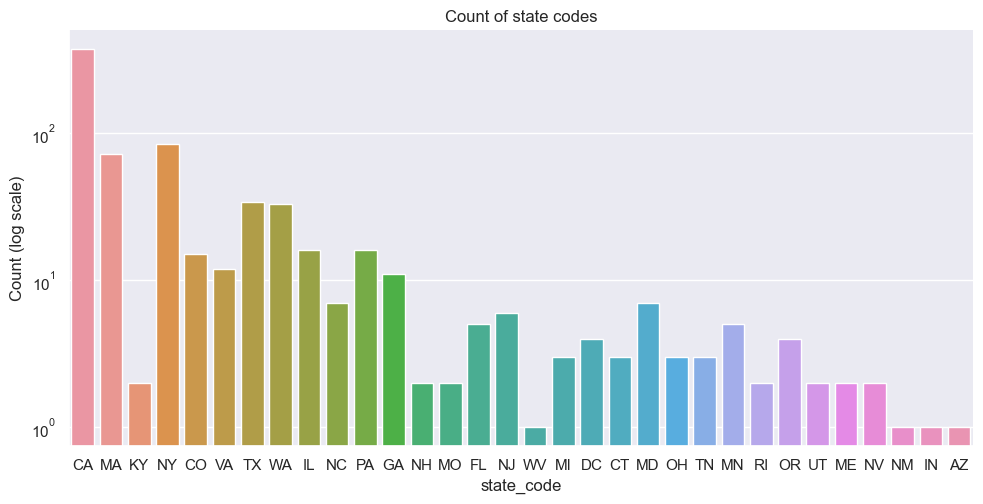

In [180]:
sb.catplot(x='state_code', kind='count', data=data_frame, height=5, aspect=2)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of state codes')

In [181]:
data_frame['state_code_codes'] = data_frame['state_code'].map({state: i for i, state in enumerate(data_frame['state_code'].unique())})
print_stats(data_frame['state_code_codes'])

# 0 in the MODE means CA, 1 means MA and etc.

mean = 3.4525745257452574
skew = 2.3270934893679924
median = 0.0
std = 5.8660812505448074
mode = 0


Text(0.5, 1.0, 'Count of catgories')

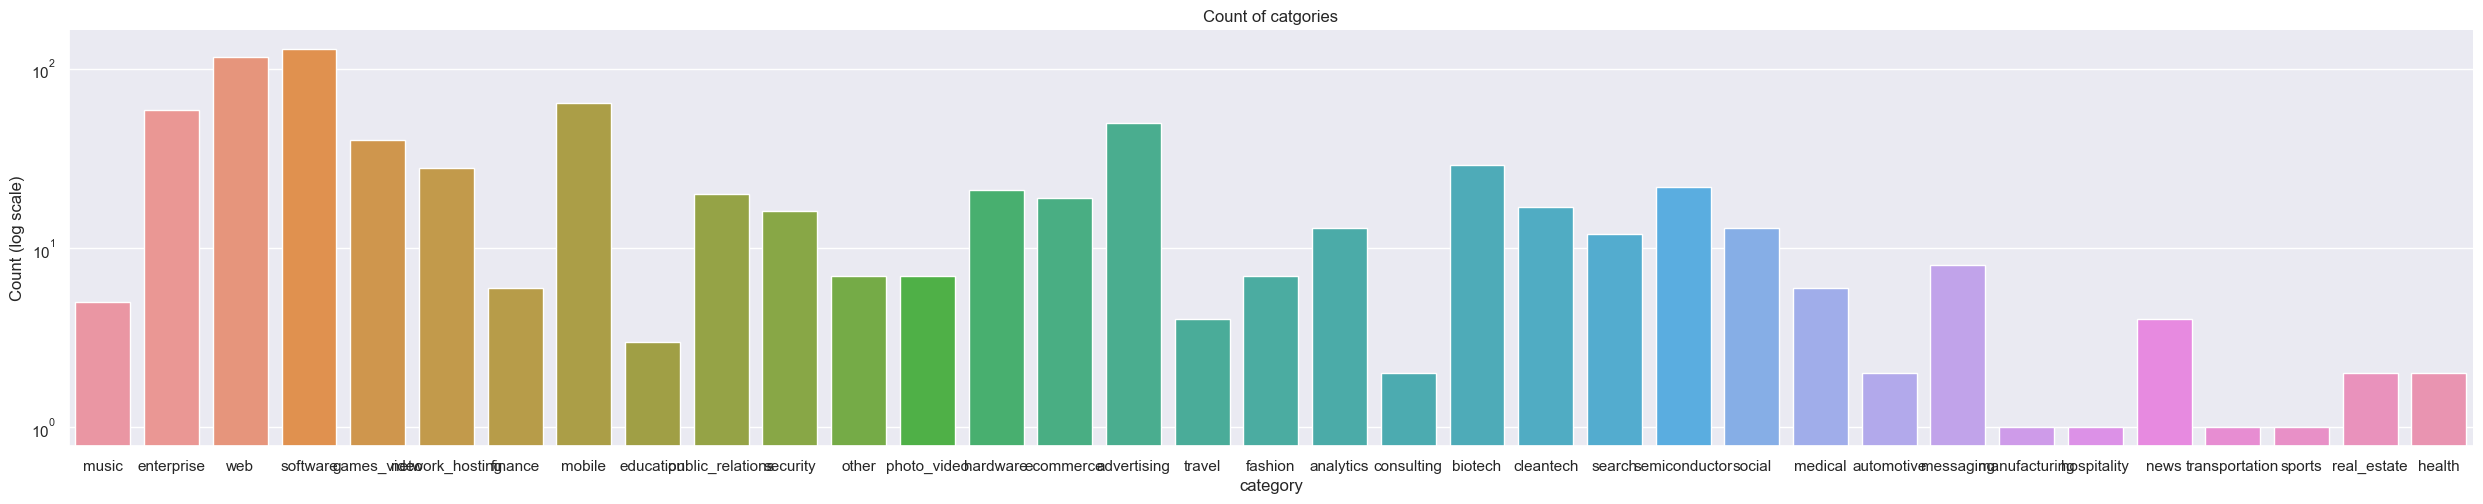

In [182]:
sb.catplot(x='category', kind='count', data=data_frame, height=5, aspect=5)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of catgories')

In [183]:
data_frame['category_codes'] = data_frame['category'].map({state: i for i, state in enumerate(data_frame['category'].unique())})
print_stats(data_frame['category_codes'])

# 0 in the MODE means music, 1 means Biotech and enterprise.

mean = 8.86720867208672
skew = 0.9515823306734885
median = 5.0
std = 7.967793588402462
mode = 3


Text(0.5, 1.0, 'Count of target')

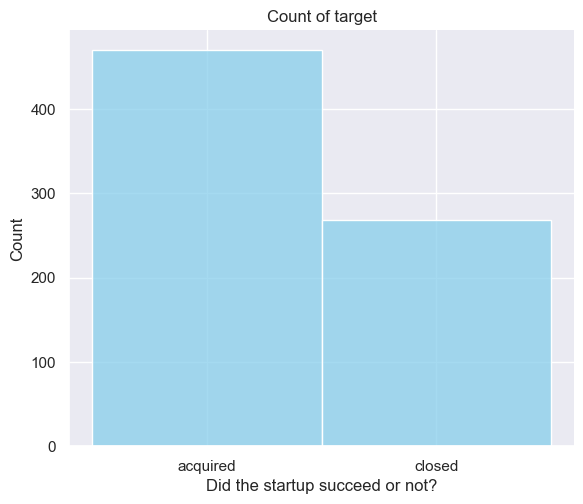

In [184]:
sb.displot(x='Target', kind='hist', data=data_frame, height=5, aspect=1.2, color='skyblue')
plt.xlabel('Did the startup succeed or not?')
plt.ylabel('Count')
plt.title('Count of target')

In [185]:
data_frame['target_codes'] = data_frame["Target"].map({'acquired': 1, 'closed': 0})
print_stats(data_frame["target_codes"])

# 1 in the MEAN means ACQUIRED

mean = 0.6368563685636857
skew = -0.5703207252379181
median = 1.0
std = 0.4812318921509238
mode = 1


#### Distribution and statistics of the numeric data

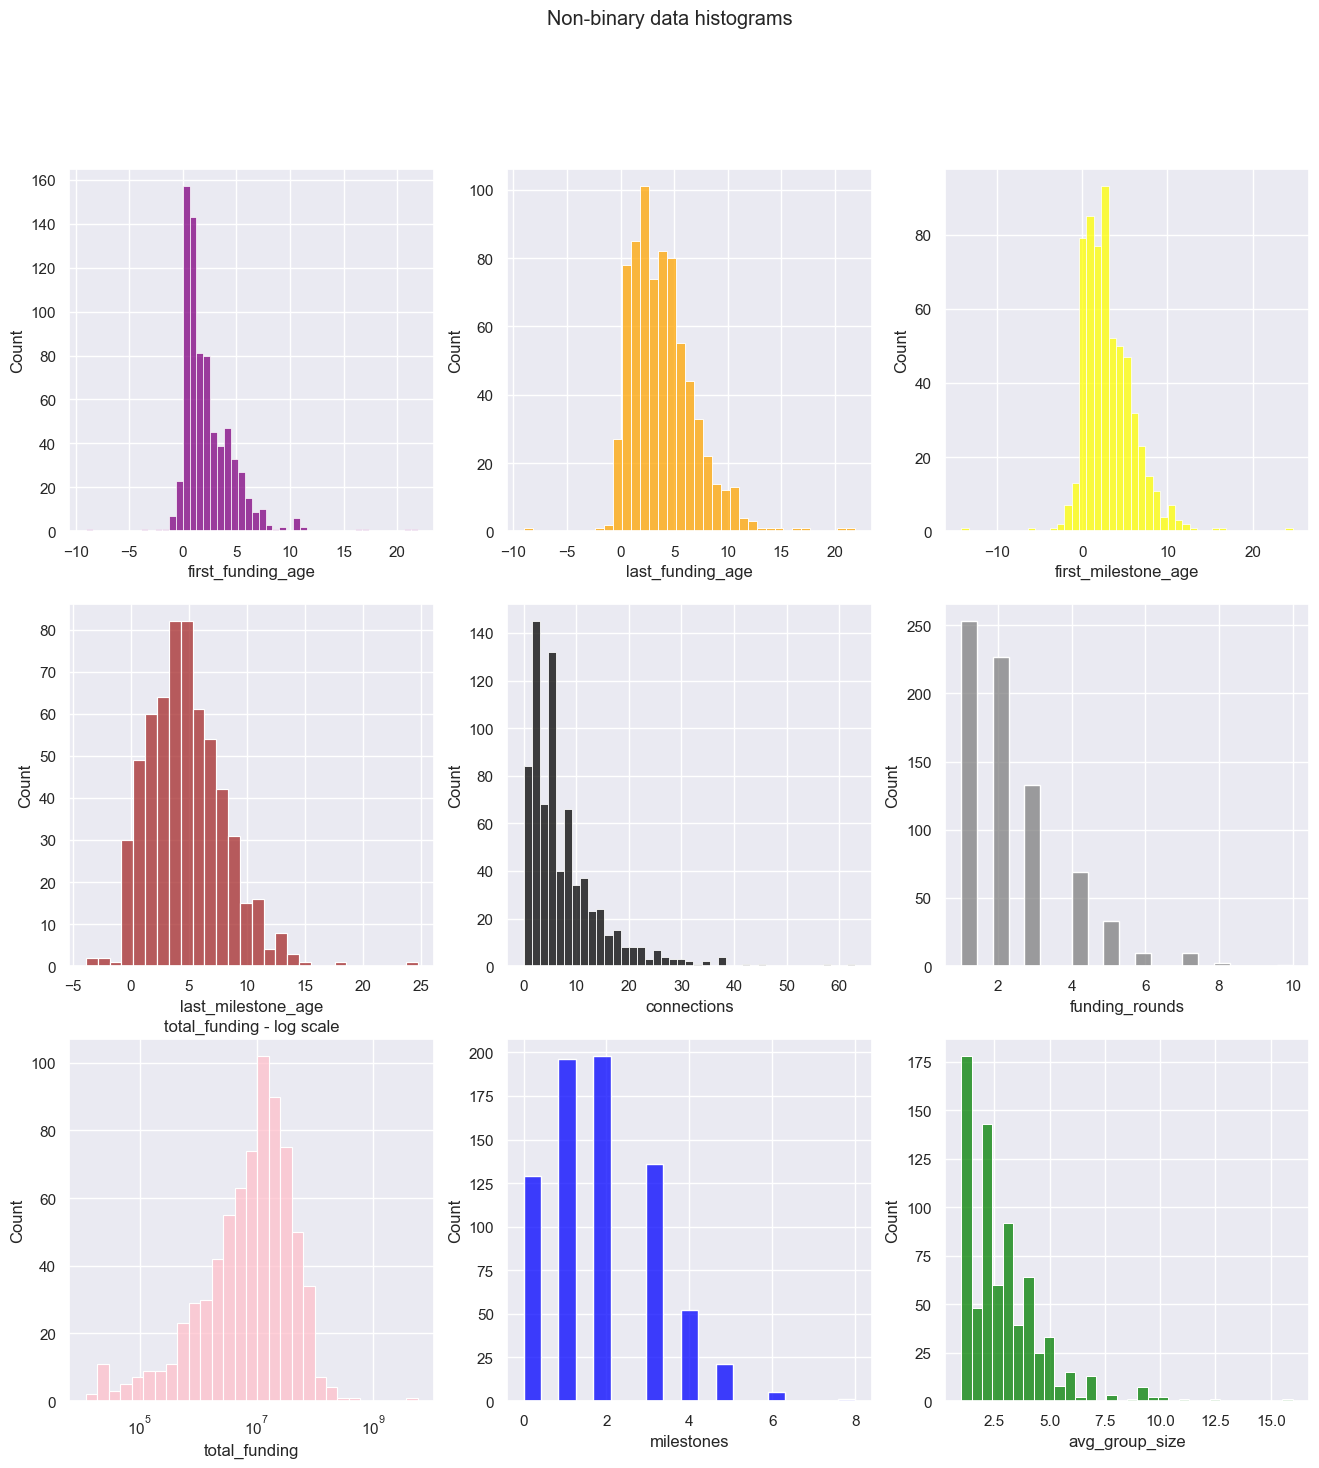

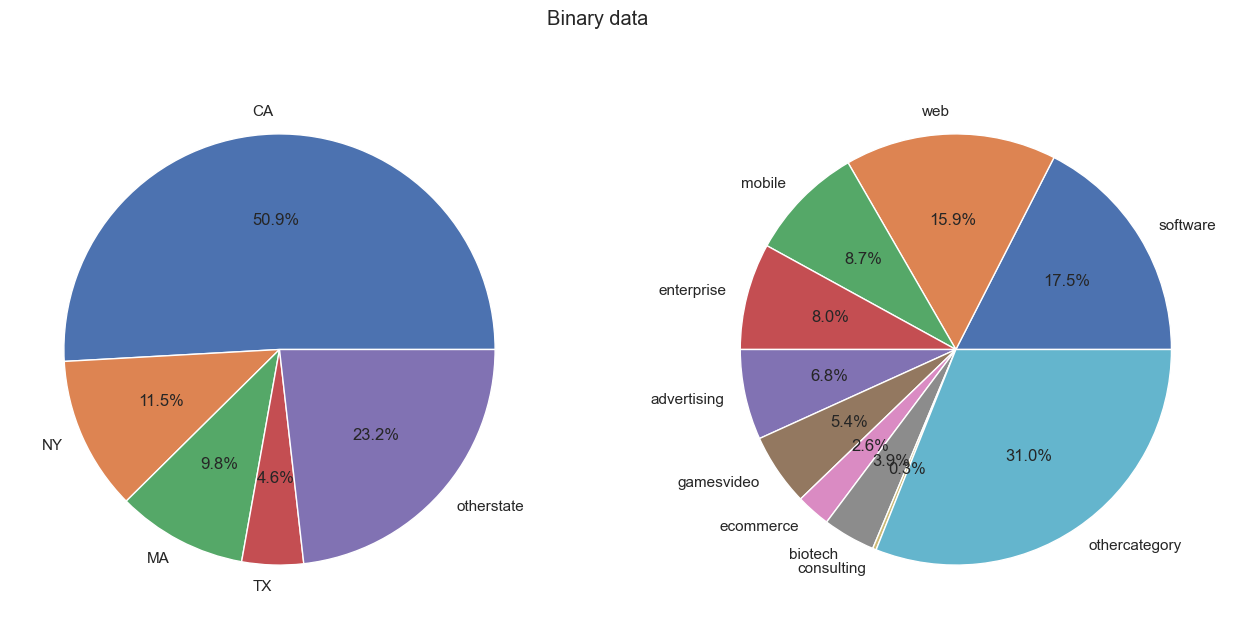

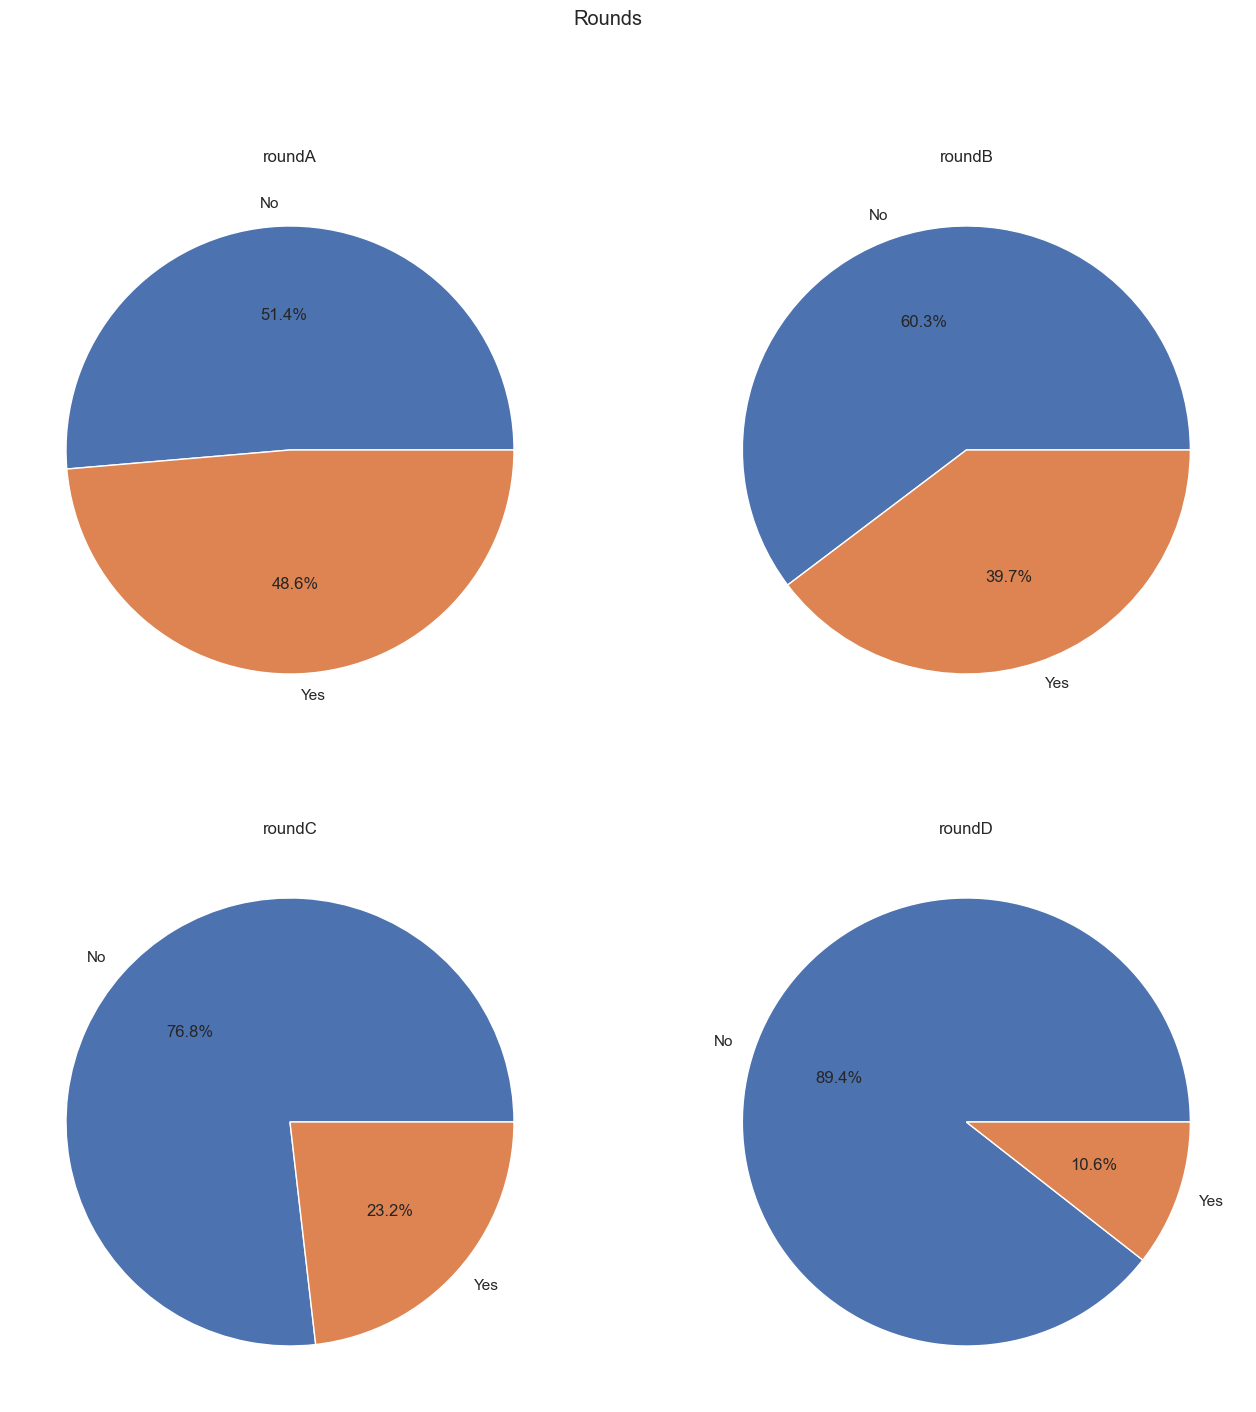

In [186]:
show_distribution_numeric(data_frame)

In [187]:
for col in data_frame.columns:
    if (data_frame[col].dtype == 'int64' or data_frame[col].dtype == 'float64') and col != 'longitude' and col != 'latitude' and 'code' not in col:
        print(f"Stats for {col}:")
        print_stats(data_frame[col])  # printing stats for each column :)
        print()

Stats for first_funding_age:
mean = 2.2326372628726285
skew = 2.2906042012119334
median = 1.50135
std = 2.5418426713393605
mode = 0.0

Stats for last_funding_age:
mean = 3.9255327913279134
skew = 1.1832429582279003
median = 3.4945000000000004
std = 3.0144426182293844
mode = 0.0

Stats for first_milestone_age:
mean = 3.0942821018062396
skew = 1.072755262123283
median = 2.6466
std = 3.004925939300737
mode = 0.0

Stats for last_milestone_age:
mean = 4.803811658456485
skew = 0.8561592404765423
median = 4.4877
std = 3.2719659799966294
mode = 4.0027

Stats for connections:
mean = 7.7046070460704605
skew = 2.441283838479683
median = 5.0
std = 7.4553036621432875
mode = 5

Stats for funding_rounds:
mean = 2.307588075880759
skew = 1.4074874166071891
median = 2.0
std = 1.3954653770048755
mode = 1

Stats for total_funding:
mean = 27381800.120596208
skew = 26.187512350847182
median = 10000000.0
std = 211732206.69525778
mode = 5000000

Stats for milestones:
mean = 1.8306233062330624
skew = 0.6168880

### 3) Show  and  explain  attributes  correlations. 

In [188]:
df_correlations = data_frame.corr(numeric_only=True)
df_correlations

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,state_code_codes,category_codes,target_codes
latitude,1.000000,0.362387,-0.057213,-0.061956,-0.076824,-0.062787,-0.050513,-0.006982,-0.085235,0.002742,...,-0.046363,-0.035337,-0.025101,-0.066926,-0.045475,-0.020249,0.048904,0.206245,-0.046982,0.037893
longitude,0.362387,1.000000,-0.002254,-0.005137,-0.053508,-0.085123,-0.073691,0.015995,0.020158,-0.008864,...,-0.042443,-0.064639,-0.082009,-0.061214,-0.064926,-0.035647,-0.094226,0.405969,0.024865,-0.022468
first_funding_age,-0.057213,-0.002254,1.000000,0.766039,0.594749,0.483144,-0.183358,-0.160621,0.046359,-0.280827,...,0.089775,-0.281353,-0.044321,0.026658,0.100231,0.118929,0.050020,0.039446,0.061401,-0.059797
last_funding_age,-0.061956,-0.005137,0.766039,1.000000,0.688097,0.637672,0.077883,0.373669,0.116076,-0.097969,...,0.057309,-0.104159,0.275057,0.300999,0.316371,0.140070,0.191046,-0.020978,0.074132,0.076505
first_milestone_age,-0.076824,-0.053508,0.594749,0.688097,1.000000,0.779016,0.255279,0.181870,0.062544,-0.030350,...,0.020669,0.014750,0.210068,0.198835,0.258259,0.063160,0.167591,-0.048946,-0.051223,0.175999
last_milestone_age,-0.062787,-0.085123,0.483144,0.637672,0.779016,1.000000,0.366169,0.250927,0.094482,0.358309,...,-0.015349,0.095117,0.278399,0.273729,0.256766,0.092565,0.211758,-0.077549,-0.090337,0.285837
connections,-0.050513,-0.073691,-0.183358,0.077883,0.255279,0.366169,1.000000,0.361143,0.096143,0.528465,...,-0.079162,0.313651,0.296837,0.261875,0.233105,0.110219,0.230391,-0.137671,-0.039766,0.354304
funding_rounds,-0.006982,0.015995,-0.160621,0.373669,0.181870,0.250927,0.361143,1.000000,0.114936,0.247676,...,-0.036626,0.241887,0.456517,0.431580,0.350841,0.057083,0.255254,-0.081839,-0.014382,0.190803
total_funding,-0.085235,0.020158,0.046359,0.116076,0.062544,0.094482,0.096143,0.114936,1.000000,0.014881,...,-0.017400,-0.029167,0.011717,0.035971,0.039217,0.050530,0.047372,0.019727,0.006470,0.040964
milestones,0.002742,-0.008864,-0.280827,-0.097969,-0.030350,0.358309,0.528465,0.247676,0.014881,1.000000,...,-0.135240,0.326341,0.204771,0.092869,0.033402,0.039267,0.180523,-0.150524,-0.142795,0.335855


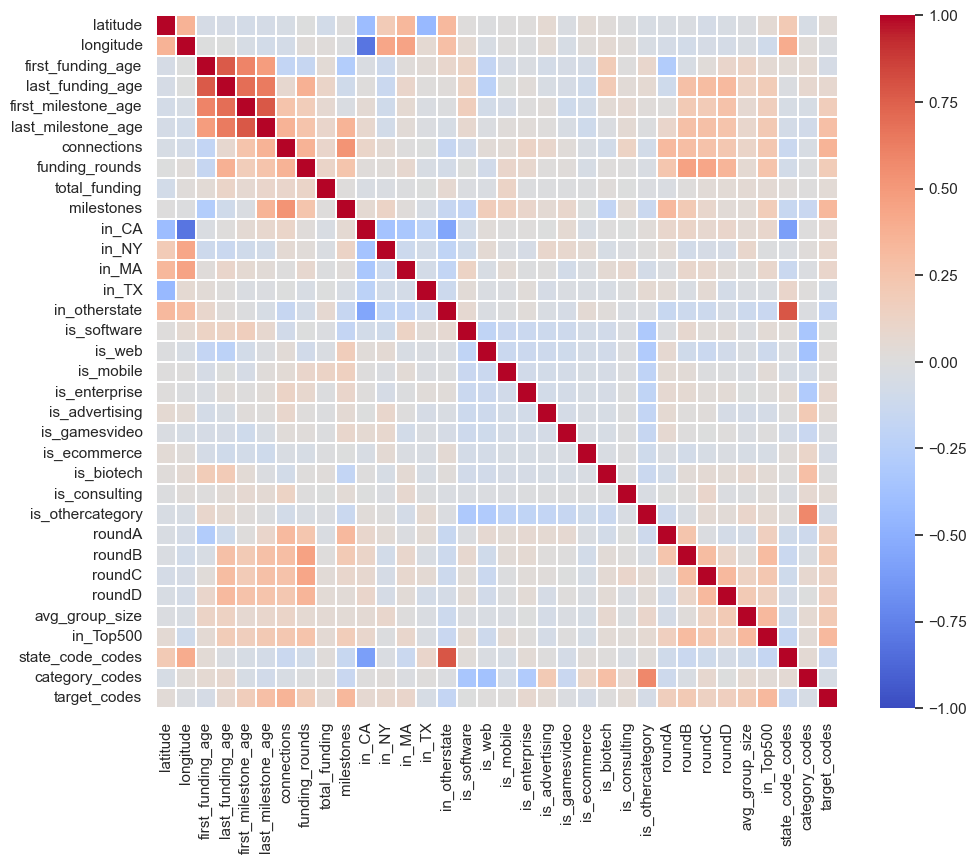

In [189]:
f, ax = plt.subplots(figsize=(11, 9))
ax = sb.heatmap(df_correlations, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.01, linecolor='white')

### 4) Show  and  explain  visualizations  that  present  interesting  insights  from  the  data,  e.g.,  identify relations,  trends,  the  effect  of  an  attribute  on  the target  variable  etc.

#### Relationships 

According to the correlation matrix, we can see that the most correlated attributes are

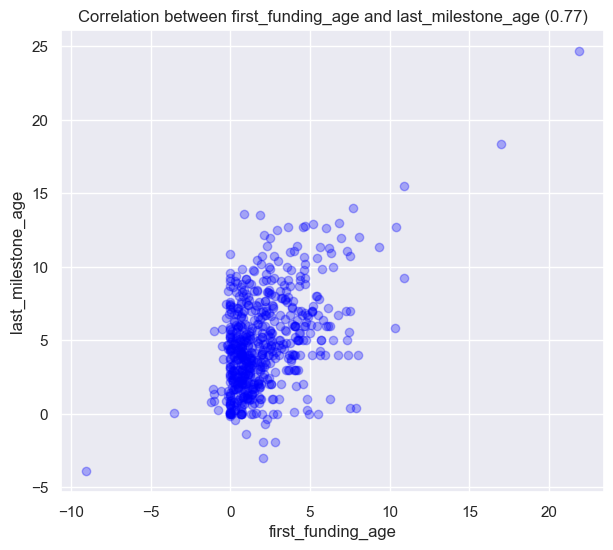

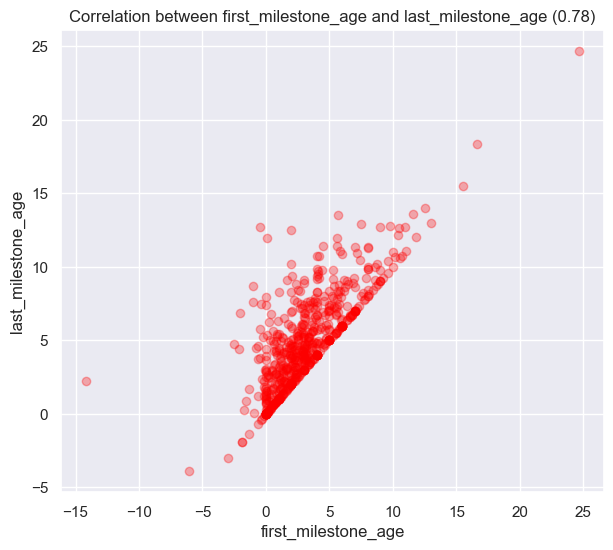

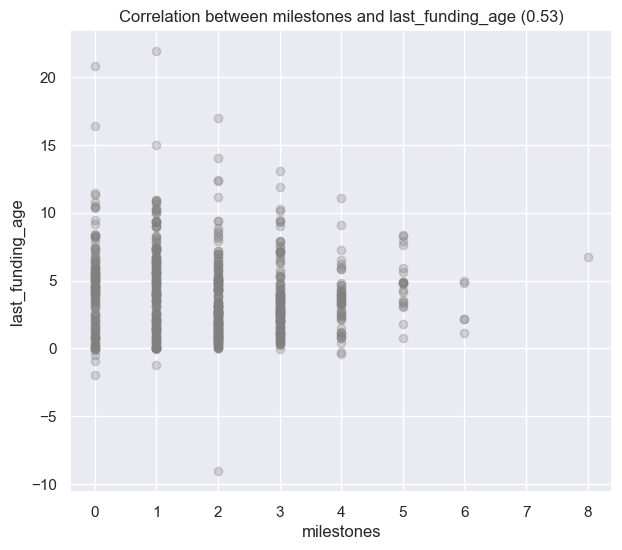

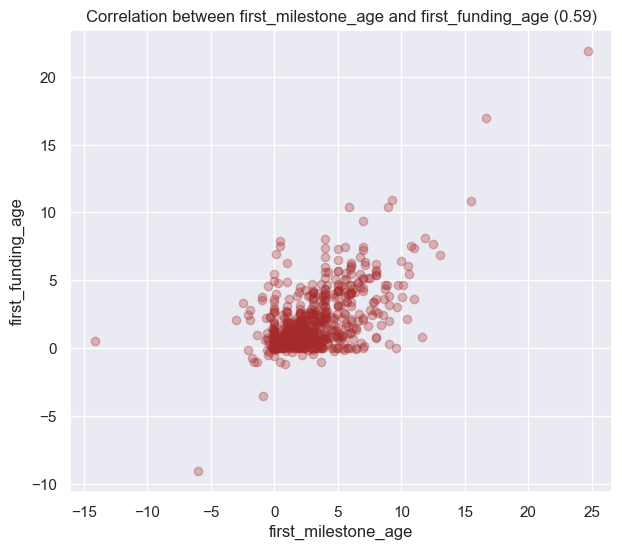

In [190]:
def show_relations(col1, col2, corr):
    colors = ['red', 'green', 'blue', 'black', 'purple', 'orange', 'brown', 'grey']  # cool colors!
    plt.figure(figsize=(7, 6))
    plt.scatter(data_frame[col1], data_frame[col2], color=choice(colors), alpha=0.3)
    plt.title(f'Correlation between {col1} and {col2} ({corr})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

relations = [('first_funding_age', 'last_milestone_age', 0.77), ('first_milestone_age', 'last_milestone_age', 0.78), ('milestones', 'last_funding_age', 0.53), ('first_milestone_age', 'first_funding_age', 0.59)]

for relation in relations:
    show_relations(relation[0], relation[1], relation[2])

Let's also examine other relations such as the relation between the country and if the startup is in the top 5000 or not

In [191]:
data_frame.loc[data_frame['in_CA'] == 1, 'country'] = 'CA'
data_frame.loc[data_frame['in_NY'] == 1, 'country'] = 'NY'
data_frame.loc[data_frame['in_MA'] == 1, 'country'] = 'MA'
data_frame.loc[data_frame['in_TX'] == 1, 'country'] = 'TX'
data_frame.loc[data_frame['in_otherstate'] == 1, 'country'] = 'other-state'

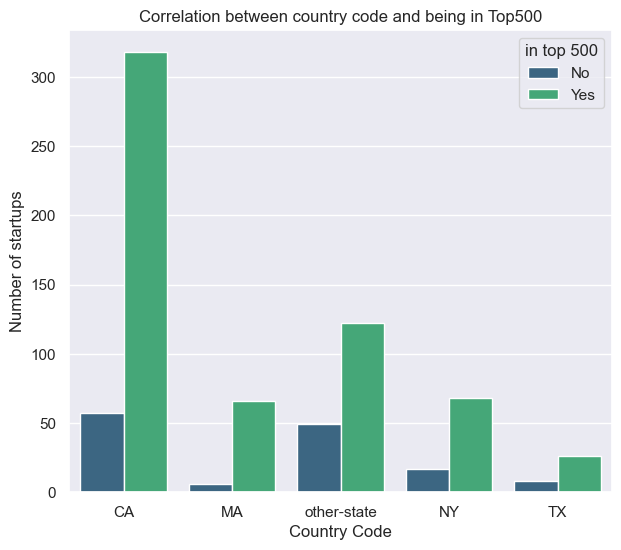

In [192]:
plt.figure(figsize=(7, 6))
sb.countplot(x='country', hue='in_Top500', data=data_frame, palette='viridis')
plt.title('Correlation between country code and being in Top500')
plt.xlabel('Country Code')
plt.ylabel('Number of startups')
plt.legend(title='in top 500', labels=['No', 'Yes'])
plt.show()

We can see from this histogram that startups in CA has more potential to be in the top 500 than other states.

In [193]:
data_frame.loc[data_frame['in_Top500'] == 1, 'in_Top500_str'] = 'Yes'
data_frame.loc[data_frame['in_Top500'] == 0, 'in_Top500_str'] = 'No'

Now we can see according to the correlation matrix that being in the top 5000 is somewhat correlated with the target variable. Let's examine this relationship more closely

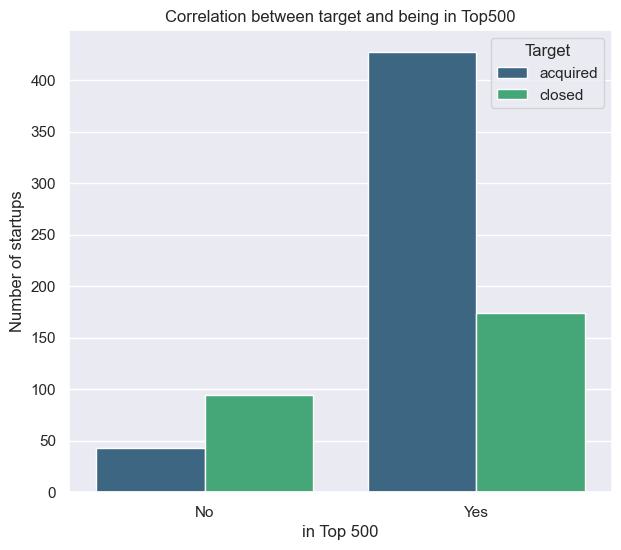

In [194]:
plt.figure(figsize=(7, 6))
sb.countplot(x='in_Top500_str', hue='Target', data=data_frame, palette='viridis')
plt.title('Correlation between target and being in Top500')
plt.xlabel('in Top 500')
plt.ylabel('Number of startups')
# plt.legend(title='Target', labels=['No', 'Yes'])
plt.show()

We can see the relationship between the success of the startup and being in the top 500 - when the startup in the top 500 it has more probability to succeed, and in the other hand, when it didn't get to the top 500 it has more probability to fail.

Now let's see the relationship between the first funding date and the first milestone age of the startup (according to the correlation matrix, their correlation is 0.6)

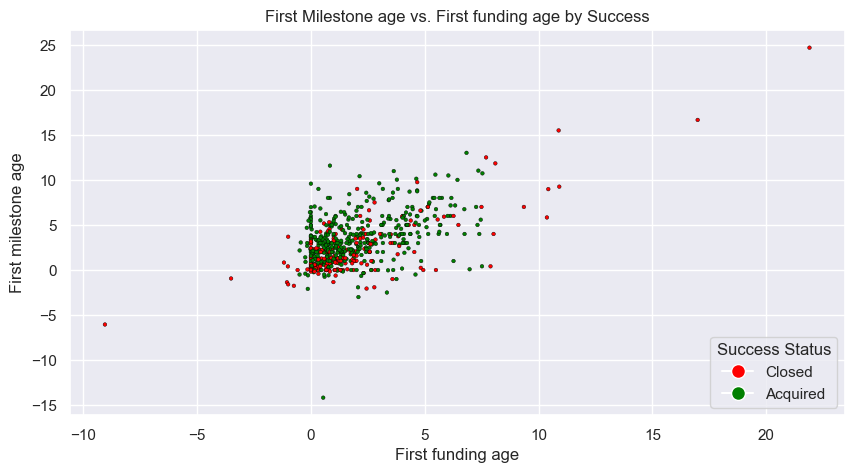

In [195]:
colordict = {'closed': 'red', 'acquired': 'green'}
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data_frame['first_funding_age'], data_frame['first_milestone_age'], s=7, c=data_frame['Target'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('First Milestone age vs. First funding age by Success')
plt.xlabel('First funding age')
plt.ylabel('First milestone age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Closed',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Acquired',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Success Status', loc='lower right')
plt.show()

We can see that the first milestone usually happens close to the first funding (because we got a relation close to linear). We can also see that company that has older first milestone age tends to not succeed.

We can do the same for the last funding age and the last milestone age (because their correlation is 0.64)

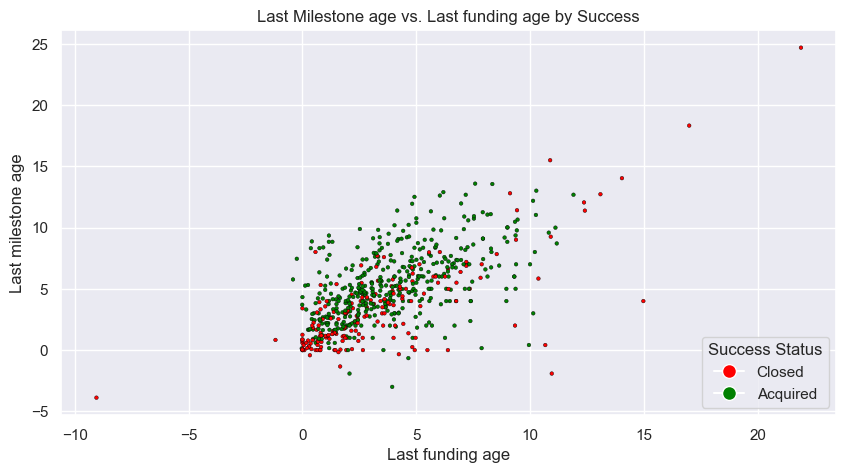

In [196]:
colordict = {'closed': 'red', 'acquired': 'green'}
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data_frame['last_funding_age'], data_frame['last_milestone_age'], s=7, c=data_frame['Target'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('Last Milestone age vs. Last funding age by Success')
plt.xlabel('Last funding age')
plt.ylabel('Last milestone age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Closed',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Acquired',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Success Status', loc='lower right')
plt.show()

### 5) Data cleaning - check for each one of the problems and take care of them properly, e.g., missing values,  inconsistent  etc. 

##### Missing values

In [197]:
data_frame[data_frame.isnull().sum(axis='columns')>0]

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,country,in_Top500_str
12,c:30290,KY,38.241467,-85.724511,40204,Louisville,Resonant Vibes,01/01/2004,11/25/2008,11/25/2008,...,0,0,1.0000,0,closed,2,2,0,other-state,No
15,c:54177,VA,38.901301,-77.265158,22182,Vienna,Invicta Networks,01/01/1999,08/09/2005,08/09/2005,...,0,0,1.0000,0,closed,5,9,0,other-state,No
24,c:458,CO,40.010492,-105.276843,80302,Boulder,EventVue,05/01/2007,08/01/2007,09/01/2007,...,0,0,4.5000,1,closed,4,9,0,other-state,Yes
32,c:27741,NC,36.002893,-78.904075,27701,Durham,eMinor,10/01/2006,08/01/2006,10/07/2008,...,0,0,2.5000,1,closed,9,3,0,other-state,Yes
34,c:34338,PA,40.441694,-79.990086,15219,Pittsburgh,Zipano,06/01/2009,07/01/2009,07/01/2009,...,0,0,1.0000,0,closed,10,10,0,other-state,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,c:25737,CA,37.502169,-122.217727,94063,Redwood City,Pearl Therapeutics,01/01/2006,07/03/2008,04/01/2013,...,1,1,3.6667,1,acquired,0,20,1,CA,Yes
731,c:15458,NY,41.019264,-73.683462,10573,Rye Brook,eBillme,10/01/2004,9/20/2006,09/01/2008,...,0,0,3.0000,1,closed,3,14,0,NY,Yes
732,c:1590,WA,47.676378,-122.122155,98052,Redmond,Smilebox,8/28/2000,02/01/2006,2/23/2010,...,0,0,3.0000,1,acquired,7,12,1,other-state,Yes
733,c:5988,CA,37.536402,-122.325129,94403,San Mateo,B-hive Networks,01/01/2005,8/25/2006,8/25/2006,...,0,0,2.0000,1,acquired,0,3,1,CA,Yes


### Spring cleaning!

let's check which columns are dirty... (has missing values :\ )

In [198]:
def check_cleanness() -> None:
    are_all_good = True
    for title in data_frame.columns:
        if data_frame[title].isnull().sum() > 0:
            are_all_good = False
            print(f"titles {title} is {choice('dirty.smells.cheesy.ugly.stinky.boring'.split('.'))}")
    if are_all_good:
        print("Cleaning is done. All good!")

check_cleanness()

titles first_milestone_age is dirty
titles last_milestone_age is stinky
titles country is boring


fill country according to the state code!

In [199]:
missing_country_df = data_frame[data_frame['country'].isnull()]
missing_country_index = missing_country_df.index[0]  # its index
missing_country_df

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,01/01/2005,03/01/2007,4/15/2008,...,0,0,2.5,1,closed,0,22,0,NaN,Yes


looks like CA is the correct country! we'll fix it -> from that we can understand that we also need to fix the in_(state_code) column, because we created the country column from it! We'll fix it later.

In [200]:
# fixing...
data_frame.loc[missing_country_index, 'country'] = 'CA'

# print a couple of lines
data_frame[missing_country_index:].head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,01/01/2005,03/01/2007,4/15/2008,...,0,0,2.5000,1,closed,0,22,0,CA,Yes
516,c:16276,CA,37.430025,-122.099980,94043,Mountain View,Sensory Networks,01/01/2003,10/10/2005,01/01/2008,...,1,0,5.0000,1,acquired,0,2,1,CA,Yes
517,c:410,CA,37.491356,-122.228843,94025,Menlo Park,Flock,01/01/2005,01/01/2005,5/21/2008,...,1,1,2.0000,1,acquired,0,2,1,CA,Yes
518,c:726,CA,37.563585,-122.324621,94043,Mountain View,AdMob,12/01/2006,09/01/2006,1/29/2009,...,1,0,2.5000,1,acquired,0,15,1,CA,Yes
519,c:8573,IL,41.879535,-87.624333,60654,Chicago,FeeFighters,01/01/2009,05/01/2010,01/12/2011,...,0,0,2.6667,1,acquired,8,14,1,other-state,Yes


In [201]:
# let's check again
check_cleanness()

titles first_milestone_age is boring
titles last_milestone_age is boring


Now we need to fill the missing values in the 'first_milestone_age' and 'last_milestone_age' columns

We saw that there is a """"linear"""" relation between the first funding age first milestone age - therefore we can fill the nulls in first milestone age according to that relation. We do the same for last funding age and last milestone age, because we observed a similar relation between them.

In [202]:
def linear_regression(x, y):
    model = LinearRegression().fit(x, y)
    return model.coef_, model.intercept_

def predict_linear_regression(x, coef, intercept):
    return coef * x + intercept

In [203]:
def predict_null_using_linear_regression(x_label, y_label):
    # get the non-null values for linear regression to predict the null values
    value_indices = data_frame[x_label].notnull() & data_frame[y_label].notnull()
    
    x = data_frame.loc[value_indices, x_label].values.reshape(-1, 1)
    y = data_frame.loc[value_indices, y_label].values.reshape(-1, 1)

    
    # linear regression
    coef, intercept = linear_regression(x, y)

    # predict the null values
    null_indices = data_frame[x_label].isnull() | data_frame[y_label].isnull()
    for index in data_frame[null_indices].index:
        data_frame.loc[index, y_label] = predict_linear_regression(data_frame.loc[index, x_label], coef, intercept)[0]

In [204]:
predict_null_using_linear_regression('first_funding_age', 'first_milestone_age')  # fill the null values of first_milestone_age
predict_null_using_linear_regression('last_funding_age', 'last_milestone_age')  # fill the null values of last_milestone_age

# check again
check_cleanness()

Cleaning is done. All good!


No more missing values! :)

#### Inconsistent values

First we can check if the state_code is consistent with the in_(state_code) values in the data_frame, changing the in_(state_code) according to the state_code.

In [205]:
def check_binary_inconsistency(columns, label):
    association_word = columns[0][:2]
    for index in data_frame[label].index:

        # x = data_frame.loc[index, columns].values#.sum()# == 1
        # x = next((col for (col, val) in zip(columns, x) if val==1)).strip("in_")
        category_code = data_frame.loc[index, label].strip("_")
        good_code = f"{association_word}_{category_code}" if f"{association_word}_{category_code}" in columns else columns[-1]
    
        if data_frame.loc[index, good_code] == 1:
            if data_frame.loc[index, columns].values.sum() == 1:  # we have only one 1 :)
                continue
            else:  # we have more than one 1 :(
                data_frame.loc[index, columns] = [0]*len(columns)
                data_frame.loc[index, good_code] = 1  # save the good one

        else:  # we don't have a one in the good column
            print("wrong values fixing now...", end=" ")
            right_value = ["0"]*len(columns)
            right_value[columns.index(good_code)] = '1'
            data_frame.loc[index, columns] = right_value
            print("done.")
    
    print("All good! No more inconsistency.")

In [206]:
check_binary_inconsistency(COLUMNS_IN_STATE, "state_code")

wrong values fixing now... done.
All good! No more inconsistency.


Secondly, we can check if the category is consistent with the is_(category) values in the data_frame, changing the is_(category) according to the category.

In [207]:
check_binary_inconsistency(COLUMNS_IS_CATEGORY, "category")

wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong values fixing now... done.
wrong valu

#### Drop columns

In [208]:
droppings = "latitude	longitude	zip_code".split("\t") + COLUMNS_IN_STATE + COLUMNS_IS_CATEGORY  # and nominal data-s
data_frame_for_PCA = data_frame.drop(droppings, axis=1)
print("Columns after dropping")
data_frame_for_PCA.columns

Columns after dropping


Index(['id', 'state_code', 'city', 'name', 'foundation_date',
       'first_funding_date', 'last_funding_date', 'first_funding_age',
       'last_funding_age', 'first_milestone_age', 'last_milestone_age',
       'connections', 'funding_rounds', 'total_funding', 'milestones',
       'category', 'roundA', 'roundB', 'roundC', 'roundD', 'avg_group_size',
       'in_Top500', 'Target', 'state_code_codes', 'category_codes',
       'target_codes', 'country', 'in_Top500_str'],
      dtype='object')

In [209]:
x = np.sort(data_frame["city"].unique())
print("\n".join(x))

Addison
Alameda
Albuquerque
Aliso Viejo
Allentown
Alpharetta
Andover
Annapolis
Arlington
Atlanta
Austin
Bala Cynwyd
Bedford
Bellevue
Belmont
Berkeley
Berwyn
Bethesda
Bethlehem
Beverly Hills
Billerica
Bingham Farms
Bloomfield
Boston
Bothell
Boulder
Boxborough
Brisbane
Brooklyn
Broomfield
Burlingame
Burlington
Calabasas
Cambridge
Campbell
Canton
Carlsbad
Carpinteria
Centennial
Champaign
Chantilly
Charlottesville
Chevy Chase
Chicago
Cincinnati
College Park
Columbia
Conshohocken
Cupertino
Dallas
Dedham
Denver
Dulles
Duluth
Durham
El Segundo
Emeryville
Englewood
Evanston
Farmington
Foster City
Framingham
Frederick
Freedom
Fremont
Glendale
Golden Valley
Greenwood Village
Hartford
Henderson
Herndon
Hillsborough
Hollywood
Indianapolis
Irvine
Itasca
Jersey City
Kansas City
Kearneysville
Kirkland
Lake Oswego
Larkspur
Las Vegas
Lawrenceville
Lexington
Lindon
Littleton
Long Island City
Longmont
Los Altos
Los Angeles
Los Gatos
Louisville
Loveland
Lowell
Manchester
Marlborough
Maynard
McLean
Memphis

We found some duplicates in the data, so we'll merge them.

In [210]:
inconsistency_cities = {'New York City': "NYC.NY.New York", 'Atlanta': 'NW Atlanta',
'Hollywood': 'North Hollywood.West Hollywood', 'Reading': "North Reading", "Billerica": "North Billerica",
"Spokane": "SPOKANE", 'San Francisco': "San Franciso.South San Francisco", "Sunnyvale": "Sunnnyvale", "Chester": "West Chester", 
"Hollywood": "West Hollywood", "Newfield": "West Newfield"}

for key, values in inconsistency_cities.items():
    for fix_from in values.split('.'):
        data_frame.loc[data_frame['city']==fix_from, "city"] = key

In [211]:
x=data_frame['city'].unique()
x = np.sort(data_frame["city"].unique())
print("\n".join(x))

Addison
Alameda
Albuquerque
Aliso Viejo
Allentown
Alpharetta
Andover
Annapolis
Arlington
Atlanta
Austin
Bala Cynwyd
Bedford
Bellevue
Belmont
Berkeley
Berwyn
Bethesda
Bethlehem
Beverly Hills
Billerica
Bingham Farms
Bloomfield
Boston
Bothell
Boulder
Boxborough
Brisbane
Brooklyn
Broomfield
Burlingame
Burlington
Calabasas
Cambridge
Campbell
Canton
Carlsbad
Carpinteria
Centennial
Champaign
Chantilly
Charlottesville
Chester
Chevy Chase
Chicago
Cincinnati
College Park
Columbia
Conshohocken
Cupertino
Dallas
Dedham
Denver
Dulles
Duluth
Durham
El Segundo
Emeryville
Englewood
Evanston
Farmington
Foster City
Framingham
Frederick
Freedom
Fremont
Glendale
Golden Valley
Greenwood Village
Hartford
Henderson
Herndon
Hillsborough
Hollywood
Indianapolis
Irvine
Itasca
Jersey City
Kansas City
Kearneysville
Kirkland
Lake Oswego
Larkspur
Las Vegas
Lawrenceville
Lexington
Lindon
Littleton
Long Island City
Longmont
Los Altos
Los Angeles
Los Gatos
Louisville
Loveland
Lowell
Manchester
Marlborough
Maynard
McLean

### 6) Data transformation -  apply  data  transformations  that  will  allow  better  analysis  and  visualizations,  e.g.,  normalization,  discretization  etc.

#### Discretization

We we'll do discretization for the connections and avg_group_size columns.   
We can use reasoning partition for the rest of them, to be able to see the "distribution" of the values.

In [212]:
bins = [0, 5, 10, 20, 40, data_frame['connections'].max()]
data_frame['connections_bins'] = pd.cut(data_frame['connections'], bins=bins, labels=False, include_lowest=True)
data_frame['connections_bins'].value_counts()

0    376
1    193
2    121
3     44
4      4
Name: connections_bins, dtype: int64

In [213]:
bins = [0, 1, 3.5, 4, 7, data_frame['avg_group_size'].max()]
data_frame['avg_group_size_bins'] = pd.cut(data_frame['avg_group_size'], bins=bins, labels=False, include_lowest=True)
data_frame['avg_group_size_bins'].value_counts()

1    376
0    172
3     99
2     73
4     18
Name: avg_group_size_bins, dtype: int64

#### Normalization

In [214]:
def normalize(data_f: pd.DataFrame, col_name: str) -> None:
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(pd.DataFrame(data_f[col_name]))
    data_f[col_name+" N"] = min_max_scaler.transform(pd.DataFrame(data_f[col_name]))

data_frame['foundation_date'] = pd.to_datetime(data_frame['foundation_date'], format='%m/%d/%Y').apply(lambda x: x.value)
data_frame['first_funding_date'] = pd.to_datetime(data_frame['first_funding_date'], format='%m/%d/%Y').apply(lambda x: x.value)
data_frame['last_funding_date'] = pd.to_datetime(data_frame['last_funding_date'], format='%m/%d/%Y').apply(lambda x: x.value)

cols = """first_funding_date, last_funding_date, first_funding_age, last_funding_age, first_milestone_age, last_milestone_age, funding_rounds, total_funding, milestones, state_code_codes, category_codes""".split(", ")
for col in cols:
    normalize(data_frame, col)

In [215]:
data_frame.head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,first_funding_age N,last_funding_age N,first_milestone_age N,last_milestone_age N,funding_rounds N,total_funding N,milestones N,state_code_codes N,category_codes N,target_codes N
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1167609600000000000,1238544000000000000,1262304000000000000,...,0.365061,0.389409,0.484841,0.370577,0.222222,0.000064,0.375,0.0,0.000000,1.0
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,946684800000000000,1108339200000000000,1261958400000000000,...,0.458030,0.615461,0.544988,0.381127,0.333333,0.007033,0.125,0.0,0.029412,1.0
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,1237334400000000000,1269907200000000000,1269907200000000000,...,0.325749,0.325749,0.402200,0.213102,0.000000,0.000454,0.250,0.0,0.058824,1.0
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1009843200000000000,1108598400000000000,1177459200000000000,...,0.393572,0.464142,0.519179,0.346024,0.222222,0.007015,0.125,0.0,0.088235,1.0
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,1280620800000000000,1280620800000000000,1333238400000000000,...,0.292368,0.346291,0.365677,0.137242,0.111111,0.000226,0.125,0.0,0.117647,0.0


In [219]:
good_cols = [col for col in data_frame.columns if "N" in col] + COLUMNS_IS_CATEGORY + COLUMNS_IN_STATE + ROUNDS + ["avg_group_size_bins", "connections_bins", "target_codes"]
data_frame_norm = data_frame[good_cols]
data_frame_norm.head()

,in_NY,first_funding_date N,last_funding_date N,first_funding_age N,last_funding_age N,first_milestone_age N,last_milestone_age N,funding_rounds N,total_funding N,milestones N,...,in_MA,in_TX,in_otherstate,roundA,roundB,roundC,roundD,avg_group_size_bins,connections_bins,target_codes
0,0,0.666141,0.698618,0.365061,0.389409,0.484841,0.370577,0.222222,0.000064,0.375,...,0,0,0,0,0,0,0,0,0,1
1,0,0.368961,0.697768,0.458030,0.615461,0.544988,0.381127,0.333333,0.007033,0.125,...,0,0,0,0,1,1,1,3,1,1
2,0,0.737724,0.717322,0.325749,0.325749,0.402200,0.213102,0.000000,0.000454,0.250,...,0,0,0,1,0,0,0,2,0,1
3,0,0.369552,0.489904,0.393572,0.464142,0.519179,0.346024,0.222222,0.007015,0.125,...,0,0,0,0,1,1,1,1,0,1
4,0,0.762177,0.873114,0.292368,0.346291,0.365677,0.137242,0.111111,0.000226,0.125,...,0,0,0,0,0,0,0,0,0,0


#### Now for the PCA!!!

In [ ]:
pca = PCA(n_components=0.999, svd_solver='full') 
pca.fit(data, y='Response')
data_frame_pca = pd.DataFrame(pca.transform(data_frame_norm))
data_frame_pca.head()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(data_pca[0], data_pca[1], c = data['target_codes'].map(colordict))

In [216]:
friday_morning = "report Liri" | "report Gilad" + pca

NameError: name 'pca' is not defined

we need to everything
do also for of 

earth map for long-lat   
sum of rounds (tot >= sum(rounds A->D))

might want to keep only the cat_code columns for the PCA! and also drop the is_(category) and in_(state_code) columns (feels irrelevant for PCA)  
ofc discretization and normalization before PCA  
and then PCA